# Abordagem 3 - UMAP
Neste caso são usados algoritmos não supervisionados para classificar o conjunto de treinamento.

In [1]:
!conda install -c conda-forge umap-learn -y

Solving environment: done


==> WARNING: A newer version of conda exists. <==
  current version: 4.9.2
  latest version: 4.10.3

Please update conda by running

    $ conda update -n base -c defaults conda



# All requested packages already installed.



In [2]:
import pandas as pd 
from sklearn.cluster import KMeans
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedShuffleSplit
import numpy as np

import matplotlib.pyplot as plt
import matplotlib.patheffects as PathEffects
import matplotlib
%matplotlib inline
import umap
from sklearn.metrics.pairwise import pairwise_distances


from scipy import linalg
import matplotlib as mpl
from mpl_toolkits.mplot3d import Axes3D  # noqa: F401 unused import

In [3]:
X_train_ = pd.read_csv("X_train.csv") 
X_test_ = pd.read_csv("X_test.csv") 
y_test_ = pd.read_csv("y_test.csv") 
X_test_.columns =['DIM_1', 'DIM_2', 'DIM_3', 'DIM_4', 'DIM_5', 'DIM_6', 'DIM_7', 
                 'DIM_8', 'DIM_9', 'DIM_10', 'DIM_11', 'DIM_12','DIM_13', 'DIM_14',
                 'DIM_15', 'DIM_16','DIM_17', 'DIM_18', 'DIM_19', 'DIM_20',]
y_test_.columns =['OUT']
X_train_.columns =['DIM_1', 'DIM_2', 'DIM_3', 'DIM_4', 'DIM_5', 'DIM_6', 'DIM_7', 
                 'DIM_8', 'DIM_9', 'DIM_10', 'DIM_11', 'DIM_12','DIM_13', 'DIM_14',
                 'DIM_15', 'DIM_16','DIM_17', 'DIM_18', 'DIM_19', 'DIM_20',]
#test_ = pd.concat([X_test, y_test], axis=1)
#test_.head()
#X_test.isnull().sum()
#X_test_ = X_test.dropna()
#train_test_split(X_test, test_size=0.05)
#train, test  = train_test_split(test_, test_size=0.05)
X_test_.head(10)

,DIM_1,DIM_2,DIM_3,DIM_4,DIM_5,DIM_6,DIM_7,DIM_8,DIM_9,DIM_10,DIM_11,DIM_12,DIM_13,DIM_14,DIM_15,DIM_16,DIM_17,DIM_18,DIM_19,DIM_20
0,0.481778,-2.690799,1.929163,2.194800,0.481778,-1.374999,-1.374999,-2.690799,2.194800,-2.650589,1.968976,2.987171,0.224900,-5.592626,0.481778,-5.644713,-5.592626,-3.261920,1.293436,0.056862
1,-0.758880,0.624947,3.096758,2.366358,-0.758880,0.614977,0.614977,0.624947,2.366358,-0.041634,-1.194561,0.320281,-1.095600,1.737322,-0.758880,1.703506,1.737322,-1.503375,-2.976826,-3.347693
2,1.547708,-0.824650,0.446411,1.946270,1.547708,2.577463,2.577463,-0.824650,1.946270,-0.986832,-1.923297,-0.587897,-1.630104,2.047893,1.547708,-1.639816,2.047893,-5.171651,0.599213,-0.236890
3,-1.593411,1.549793,3.488298,3.629761,-1.593411,0.998859,0.998859,1.549793,3.629761,-0.543969,-2.786350,-0.314272,-0.619047,2.110562,-1.593411,2.709332,2.110562,-2.212294,-3.313402,-2.805601
4,3.085533,-1.584111,1.057157,0.850008,3.085533,1.026912,1.026912,-1.584111,0.850008,0.642361,1.354507,0.484823,-1.107261,0.751787,3.085533,-4.033858,0.751787,-3.470866,0.811846,-2.874889
5,0.225221,-2.022480,2.492887,2.109219,0.225221,-0.113400,-0.113400,-2.022480,2.109219,-2.115855,0.806688,2.754259,-1.220831,-3.625507,0.225221,-4.048901,-3.625507,-4.361640,0.614697,-0.884426
6,1.685156,-1.888123,1.868993,3.164648,1.685156,0.819944,0.819944,-1.888123,3.164648,-1.777343,-0.063630,0.918951,-0.525844,-1.127290,1.685156,-4.288397,-1.127290,-5.055856,0.485159,-1.200129
7,0.520673,-1.462370,3.473858,2.355155,0.520673,0.524558,0.524558,-1.462370,2.355155,-0.945509,0.457348,2.104907,-2.036561,-0.670842,0.520673,-2.126162,-0.670842,-3.902823,-1.457445,-3.471213
8,-1.353294,1.534632,3.749267,2.671265,-1.353294,0.829007,0.829007,1.534632,2.671265,0.311106,-1.871476,0.243888,-1.184842,2.051934,-1.353294,2.585362,2.051934,-1.762989,-3.270411,-3.847704
9,0.580345,0.631322,0.713587,2.303129,0.580345,2.815299,2.815299,0.631322,2.303129,-0.772003,-3.148032,-0.912143,-1.194035,1.789704,0.580345,-0.792237,1.789704,-5.637653,1.119476,0.322888


In [4]:
from sklearn.impute import SimpleImputer
#X_train_ = X_train.dropna()
#print(X_train_.isnull().sum())
imp_mean = SimpleImputer( strategy='mean')
imp_mean.fit(X_train_)

X_train_ = imp_mean.transform(X_train_)
#X_train_ = imp_mean.transform(X_train)

imp_mean = SimpleImputer( strategy='mean', missing_values=np.NaN)
imp_mean.fit(X_train_)
X_train_ = imp_mean.transform(X_train_)
#X_train_.shape

#X_train_

In [5]:
#sss = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=0)
#sss.get_n_splits(X_test_, y_test_)

#for train_index, test_index in sss.split(X_test_, y_test_):
#    #print("TRAIN:", train_index, "TEST:", test_index)
#    X_train, X_traintest = X_test_.iloc[train_index], X_test_.iloc[test_index]
#    y_train, y_traintest = y_test_.iloc[train_index], y_test_.iloc[test_index]
##y_traintest.head(25)

In [6]:
#X_traintest.head(15)

## UMAP

In [7]:
reducer = umap.UMAP()
#var_proj = TSNE(random_state=420).fit_transform(X_train_)
var_proj = reducer.fit_transform(X_train_)
var_proj
#print(var_proj[360,:])

array([[-0.29132703,  2.568057  ],
       [ 9.635523  ,  3.740958  ],
       [ 6.784926  ,  6.902535  ],
       ...,
       [ 2.6505413 ,  6.231983  ],
       [ 7.143337  ,  6.533713  ],
       [ 2.2542207 ,  4.2403336 ]], dtype=float32)

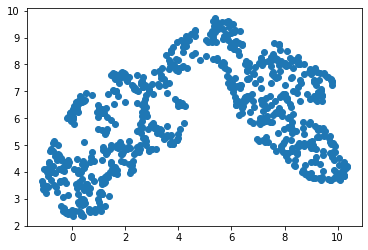

In [8]:
plt.scatter(var_proj[:,0], var_proj[:,1])
plt.show()

## Gaussian Mixture Mode

In [9]:
import itertools
color_iter = itertools.cycle(['navy', 'c', 'cornflowerblue', 'gold',
                              'darkorange'])
def plot_results(X, Y_, means, covariances, index, title):
    splot = plt.subplot(2, 1, 1 + index)
    for i, (mean, covar, color) in enumerate(zip(
            means, covariances, color_iter)):
        v, w = linalg.eigh(covar)
        v = 2. * np.sqrt(2.) * np.sqrt(v)
        u = w[0] / linalg.norm(w[0])
        # as the DP will not use every component it has access to
        # unless it needs it, we shouldn't plot the redundant
        # components.
        if not np.any(Y_ == i):
            continue
        plt.scatter(X[Y_ == i, 0], X[Y_ == i, 1], .8 )#, color=color)

        # Plot an ellipse to show the Gaussian component
        angle = np.arctan(u[1] / u[0])
        angle = 180. * angle / np.pi  # convert to degrees
        ell = mpl.patches.Ellipse(mean, v[0], v[1], 180. + angle, color=color)
        ell.set_clip_box(splot.bbox)
        ell.set_alpha(0.5)
        splot.add_artist(ell)
        plt.grid(True)

    #plt.xlim(-9., 5.)
    #plt.ylim(-3., 6.)
    #plt.xticks(())
    #plt.yticks(())
    plt.title(title)

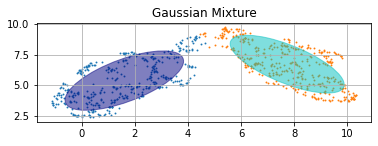

In [10]:
from sklearn import mixture

fig = plt.figure()
# Fit a Gaussian mixture with EM using five components
gmm = mixture.GaussianMixture(n_components=2, covariance_type='full').fit(var_proj)
plot_results(var_proj, gmm.predict(var_proj), gmm.means_, gmm.covariances_, 0,
             'Gaussian Mixture')

# fit a Gaussian Mixture Model with two components
y_gmm_pred = gmm.predict(var_proj)
#np.sum(y_gmm_pred)

In [11]:
# Fit a Dirichlet process Gaussian mixture using five components
dpgmm = mixture.BayesianGaussianMixture(n_components=2,
                                        covariance_type='full')
gmm_pred = dpgmm.fit(var_proj)
y_dpgmm_pred = gmm_pred.predict(var_proj)
np.sum(y_dpgmm_pred)

411

In [12]:
#confusion_matrix(y_train, np.abs(1-y_dpgmm_pred))
#confusion_matrix(y_traintest, y_dpgmm_pred)

In [14]:
#confusion_matrix(y_train, abs(1-y_gmm_pred))
#confusion_matrix(y_traintest, y_gmm_pred)

In [16]:
#y_train_pred = gmm_pred.predict(GMM_train)
#y_train_pred

## Treinar um classificador stacking
Usando os rotulos calculados anteriormente.

In [17]:
from sklearn.ensemble import StackingClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import LogisticRegressionCV

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score, RepeatedStratifiedKFold
from collections import defaultdict
from sklearn import mixture
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import LogisticRegressionCV
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import SGDClassifier

base_models = [('random_forest', RandomForestClassifier(n_estimators=50)),
               ('svm', SVC()),
               ('knn', KNeighborsClassifier(n_neighbors=11))]
meta_model = LogisticRegressionCV()
stacking_model = StackingClassifier(estimators=base_models, 
                                    final_estimator=meta_model, 
                                    stack_method='predict',
                                    #passthrough=True, 
                                    cv=5,
                                    verbose=2
                                   )

In [18]:
def evaluate_model(model, X, y):
    cv = RepeatedStratifiedKFold(n_splits=3, n_repeats=2, random_state=1)
    scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, verbose=1, n_jobs=3, error_score='raise')
    return scores
model_scores = defaultdict()

In [19]:
stacking_scores = evaluate_model(stacking_model, var_proj, y_gmm_pred)
model_scores['stacking'] = stacking_scores

[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done   6 out of   6 | elapsed:    2.4s finished


In [20]:
stacking_model.fit(var_proj, y_dpgmm_pred)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.4s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.1s finished


StackingClassifier(cv=5,
                   estimators=[('random_forest',
                                RandomForestClassifier(n_estimators=50)),
                               ('svm', SVC()),
                               ('knn', KNeighborsClassifier(n_neighbors=11))],
                   final_estimator=LogisticRegressionCV(),
                   stack_method='predict', verbose=2)

In [21]:
## Conferindo o teste
y_test_predict = stacking_model.predict( reducer.transform(X_test_))

In [23]:
confusion_matrix(y_test_, y_test_predict)

array([[86, 13],
       [11, 89]])